In [13]:
#libraries required
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Multivariate Linear Regression

Implementation od multivariate linear regression (from scratch) to predict the quality of white wine given its chemical measures.The dataset contains 11 input varibles and one output variable. Here is the description:

- $x_1$ = Fixed acidity 
- $x_2$ = Volatile acidity 
- $x_3$ = Citric acid 
- $x_4$ = Residual sugar 
- $x_5$ = Chlorides 
- $x_6$ = Free sulfur dioxide 
- $x_7$ = Total sulfur dioxide 
- $x_8$ = Density 
- $x_9$ = pH 
- $x_{10}$ = Sulphates 
- $x_{11}$ = Alcohol 
- $y$ = Quality (score between 0 and 10)

### Implementation of cost function and gradient descent for multivariate linear regression

In [14]:
# Load and Peprocess dataset
def preProcessDataSet():
    
    dataSet = np.loadtxt(os.path.join("Data", "ex2data2.txt"), delimiter=',')
    x , y = dataSet[:, :11] , dataSet[:,11]
    y = y.reshape(y.shape[0], 1)
    
    bais = np.ones((x.shape[0],1))   # intialize bais with one to length of input x    
    x = np.column_stack((bais,x))   # stack bais and x1 to make loss funtion and gradient descent easy
    
    return x, y

In [15]:
# Call data Preprocessing
X, Y = preProcessDataSet()  

In [16]:
#change data type accordinly
X = X.astype(np.float)
Y = Y.astype(np.float)      

In [17]:
#Normalize all feature to optimize the learning process
def  featureNormalize(x):
 
    X_norm = x.copy()
    
    for i in range(x.shape[1]):
        if i != 0:   # skip for bais which is X[:,0]
            X_norm[:,i]= (x[:,i] - np.mean(x[:,i])) / np.std(x[:,i])

    return X_norm

In [18]:
#normalize data
X = featureNormalize(X)

In [19]:
#predict function
def predict(X,W):
    h_x = 0.0
    hx=np.dot(X,W)
    return hx

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$ 

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x$$

In [20]:
# Calculates Loss
def lossFunction( X , actual_Y , thetas ):
        
        m =  X.shape[0]    # number of total data points
        m = m*2
        
        pred_Y = predict(X,thetas)              # predict Y by taking dot product of input data and related thetas
        diff = pred_Y - actual_Y                # different between actual and predicted output
        diff_square = np.power(diff, 2)         # squaring the difference    
        summation = np.sum(diff_square)         # summation over all calculated differences
 
        loss = summation/(2 * m)       # calculating loss
        
        return loss

Paramenters need to be learned by Model are the $\theta_j$ values. These are
the values that will be adjusted to minimize cost $J(\theta)$.
One way to do this is to use the gradient descent algorithm. 


$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x^{(j)} $$

With each step of gradient descent,  parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

In [21]:
# Gradient Descent
def gradientDescent(X, Y, alpha,  no_of_iterations):
        
        thetas  =  np.zeros((X.shape[1],1), dtype = float) # initializes thetas for bais and X values
        loss =  list()   # list for loss of each iteration
        m =  X.shape[0]    # number of total data points
        
        for ittr in range(no_of_iterations):  # till no of itterations
            
            hx = predict(X,thetas)    # predict Y by taking dot product of input data and  new calculated thetas
            diff = hx - Y       # calculate difference between actual and predicted Y
            
            for i in range(X.shape[1]):  # for each theta/feature
                
                summation = np.sum(diff.T* X[:,i]) # multiply the difference with each input column in X    
                thetas[i] =  thetas[i] - ((alpha/m)*summation)  # update theta for each feature
            
                
            loss.append(lossFunction(X,Y,thetas))   # calculate loss for each itteration
                 
        return thetas , loss

In [22]:
#Train Model 
n_epochs = 100
alpha = 0.01
learned_thetas, loss_list = gradientDescent(X,Y, alpha, n_epochs)

In [23]:
#Plot Loss
def plotLoss(loss , no_of_iteration ): 
    plt.xticks(range(1,no_of_iteration))
    plt.plot(loss)
    plt.xlabel("No of iterations")
    plt.ylabel("Loss")
    plt.show()

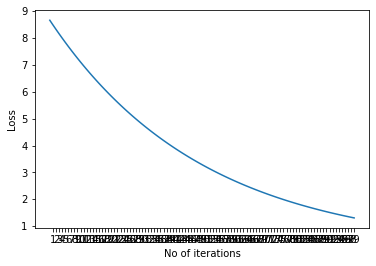

In [24]:
plotLoss(loss_list, n_epochs)